# Homework 3: Machine Learning for Classification for Machine Learning Zoomcamp 2025

In [219]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [220]:
# Load dataset
url = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv"
df = pd.read_csv(url)
df.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   lead_source               1334 non-null   object 
 1   industry                  1328 non-null   object 
 2   number_of_courses_viewed  1462 non-null   int64  
 3   annual_income             1281 non-null   float64
 4   employment_status         1362 non-null   object 
 5   location                  1399 non-null   object 
 6   interaction_count         1462 non-null   int64  
 7   lead_score                1462 non-null   float64
 8   converted                 1462 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 102.9+ KB


In [222]:
df.dtypes

lead_source                  object
industry                     object
number_of_courses_viewed      int64
annual_income               float64
employment_status            object
location                     object
interaction_count             int64
lead_score                  float64
converted                     int64
dtype: object

In [223]:
# Count unique values in each column 
unique_counts = df.nunique()
print("Unique value count per column:\n")
print(unique_counts)

Unique value count per column:

lead_source                    5
industry                       7
number_of_courses_viewed      10
annual_income               1267
employment_status              4
location                       7
interaction_count             12
lead_score                   101
converted                      2
dtype: int64


In [224]:
# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['number']).columns

print("\nCategorical columns:", list(categorical_cols))
print("Numerical columns:", list(numerical_cols))


Categorical columns: ['lead_source', 'industry', 'employment_status', 'location']
Numerical columns: ['number_of_courses_viewed', 'annual_income', 'interaction_count', 'lead_score', 'converted']


In [225]:
# Replace missing values
# For categorical features, replace with 'NA'
df[categorical_cols] = df[categorical_cols].fillna('NA')

# For numerical features, replace with 0.0
df[numerical_cols] = df[numerical_cols].fillna(0.0)

In [226]:
#  Verify no missing values remain
missing_after = df.isna().sum()
print("\nMissing values after replacement:\n", missing_after)

# Find the mode (most frequent value) for the 'industry' column
industry_mode = df['industry'].mode()[0]
print("\nThe most frequent observation (mode) for the column 'industry' is:", industry_mode)


Missing values after replacement:
 lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64

The most frequent observation (mode) for the column 'industry' is: retail


In [227]:
# Split the dataset
# Ensure 'converted' is not in the feature DataFrame
features = df.drop(columns=['converted'])
y = df['converted']

df_full_train, df_test, y_full_train, y_test = train_test_split(
    features, y, test_size=0.2, random_state=42
)

# Second split: 60% train and 20% validation (0.25 * 80% = 60% train, 20% val)
df_train, df_val, y_train, y_val = train_test_split(
    df_full_train, y_full_train, test_size=0.25, random_state=42
)

# Verify split proportions
print("\nDataset sizes:")
print(f"Train: {len(df_train)} ({len(df_train)/len(df):.2%})")
print(f"Validation: {len(df_val)} ({len(df_val)/len(df):.2%})")
print(f"Test: {len(df_test)} ({len(df_test)/len(df):.2%})")


Dataset sizes:
Train: 876 (59.92%)
Validation: 293 (20.04%)
Test: 293 (20.04%)


In [228]:
# Select numerical features (excluding target)
selected_features = ['number_of_courses_viewed', 'annual_income', 'interaction_count', 'lead_score']

# Compute correlation matrix
corr_matrix = df[selected_features].corr()
print("Correlation matrix:\n")
corr_matrix

Correlation matrix:



,number_of_courses_viewed,annual_income,interaction_count,lead_score
number_of_courses_viewed,1.000000,0.009770,-0.023565,-0.004879
annual_income,0.009770,1.000000,0.027036,0.015610
interaction_count,-0.023565,0.027036,1.000000,0.009888
lead_score,-0.004879,0.015610,0.009888,1.000000


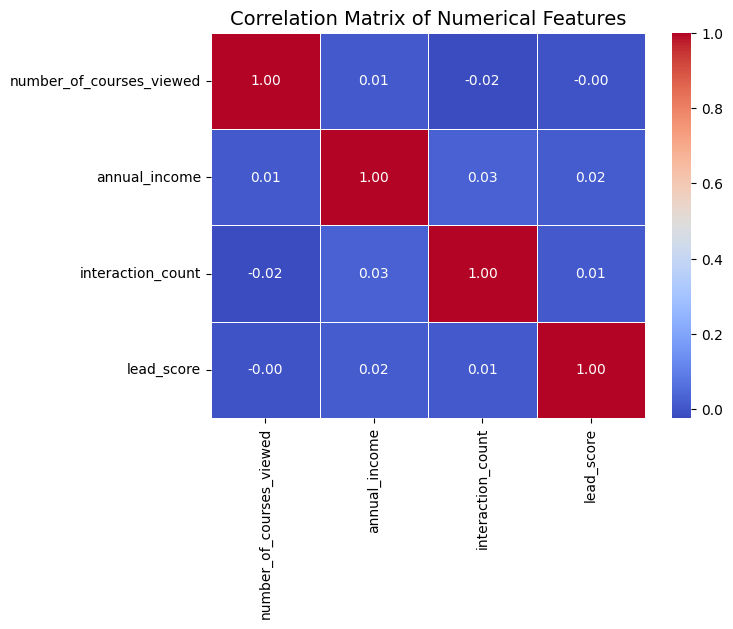

In [229]:
# Plot correlation heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    linewidths=0.5,
    fmt=".2f"
)
plt.title("Correlation Matrix of Numerical Features", fontsize=14)
plt.show()

In [230]:
# Mutual information scores for categorical variables
# Calculate mutual information scores for specified categorical variables
variables_of_interest = ['industry', 'location', 'lead_source', 'employment_status']
mi_scores = {}
for col in variables_of_interest:
    score = mutual_info_score(df_train[col], y_train)
    mi_scores[col] = round(score, 2)

# Print mutual information scores
print("\nMutual Information Scores (rounded to 2 decimals):")
for col, score in mi_scores.items():
    print(f"{col}: {score}")

# Identify the variable with the highest mutual information score
max_score_var = max(mi_scores, key=mi_scores.get)
max_score = mi_scores[max_score_var]
print(f"\nThe variable with the highest mutual information score is '{max_score_var}' with a score of {max_score}")


Mutual Information Scores (rounded to 2 decimals):
industry: 0.01
location: 0.0
lead_source: 0.04
employment_status: 0.01

The variable with the highest mutual information score is 'lead_source' with a score of 0.04


In [231]:
# Convert train/val sets to dictionaries (for DictVectorizer)
train_dicts = X_train.to_dict(orient='records')
val_dicts = X_val.to_dict(orient='records')

In [232]:
# Vectorize with DictVectorizer
dv = DictVectorizer(sparse=False)
X_train_encoded = dv.fit_transform(train_dicts)
X_val_encoded = dv.transform(val_dicts)


In [233]:
# Train logistic regression model
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train_encoded, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [234]:
# Evaluate accuracy
y_pred = model.predict(X_val_encoded)
original_accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", round(original_accuracy, 2))

Validation Accuracy: 0.7


In [235]:
# Features to test for elimination
features_to_test = ['industry', 'employment_status', 'lead_score']

# Dictionary to store accuracy differences
accuracy_differences = {}

# Train a model excluding each feature
for feature in features_to_test:
    # Create a copy of X_train and X_val without the feature
    X_train_temp = X_train.drop(columns=[feature])
    X_val_temp = X_val.drop(columns=[feature])
    
    # Convert to dictionaries
    train_dicts_temp = X_train_temp.to_dict(orient='records')
    val_dicts_temp = X_val_temp.to_dict(orient='records')
    
    # Vectorize
    dv_temp = DictVectorizer(sparse=False)
    X_train_temp_encoded = dv_temp.fit_transform(train_dicts_temp)
    X_val_temp_encoded = dv_temp.transform(val_dicts_temp)
    
    # Train model
    model_temp = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model_temp.fit(X_train_temp_encoded, y_train)
    
    # Calculate accuracy
    y_pred_temp = model_temp.predict(X_val_temp_encoded)
    accuracy_temp = accuracy_score(y_val, y_pred_temp)
    
    # Calculate difference
    difference = original_accuracy - accuracy_temp
    accuracy_differences[feature] = difference
    
    print(f"\nAccuracy without {feature}: {accuracy_temp:.4f}")
    print(f"Difference (original - without {feature}): {difference:.4f}")

# Identify the feature with the smallest absolute difference
min_diff_feature = min(accuracy_differences, key=lambda x: abs(accuracy_differences[x]))
min_diff = accuracy_differences[min_diff_feature]
print(f"\nThe feature with the smallest difference is '{min_diff_feature}' with a difference of {min_diff:.4f}")


Accuracy without industry: 0.6997
Difference (original - without industry): 0.0000

Accuracy without employment_status: 0.6962
Difference (original - without employment_status): 0.0034

Accuracy without lead_score: 0.7065
Difference (original - without lead_score): -0.0068

The feature with the smallest difference is 'industry' with a difference of 0.0000


In [236]:
C_values = [0.01, 0.1, 1, 10, 100]
accuracies = {}

for C in C_values:
    # Train model with current C
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000, random_state=42)
    model.fit(X_train_encoded, y_train)
    
    # Evaluate accuracy on validation set
    y_pred = model.predict(X_val_encoded)
    accuracy = accuracy_score(y_val, y_pred)
    accuracies[C] = round(accuracy, 3)
    
    print(f"\nValidation Accuracy with C={C}: {accuracies[C]}")

# Identify the C value with the highest accuracy (smallest C if tied)
best_C = min([C for C, acc in accuracies.items() if acc == max(accuracies.values())])
best_accuracy = accuracies[best_C]
print(f"\nThe best C value is {best_C} with a validation accuracy of {best_accuracy}")


Validation Accuracy with C=0.01: 0.7

Validation Accuracy with C=0.1: 0.7

Validation Accuracy with C=1: 0.7

Validation Accuracy with C=10: 0.7

Validation Accuracy with C=100: 0.7

The best C value is 0.01 with a validation accuracy of 0.7
